In [22]:
import meep as mp
from meep import mpb
import numpy as np
from matplotlib import pyplot as plt

My_LiNbO3= mp.Medium(epsilon_diag=mp.Vector3(5.1092, 4.7515, 5.1092))
wavelength = 1.55
omega      = 1/wavelength
w = 1    # Si width (um)
h = 0.5  # Si height (um)
# geometry = [mp.Block(size=mp.Vector3(mp.inf, w, h), material=Si)]

# 폭 (y: width)
min_g= 0.424 # minimum gap
w_top= 0.798 # top width (output waveguide)
w_bot= w_top+ min_g #bottom width (1222 nm) 

Target_size = mp.Vector3(LNsub_h + LNwg_h, 1.4, 0)


geometry= [
    # mp.Block(#SiO2 substrate
    #     center= mp.Vector3(X_min+ 0.5*SiO2_h, 0, 0+ Lpml/2),
    #     material= SiO2,
    #     size= mp.Vector3(SiO2_h, Sy, Sz+ Lpml)
    # ),
    # mp.Block(#LiNbO3 substrate
    #     center= mp.Vector3(X_min+ SiO2_h+ 0.5*LNsub_h, 0, 0+ Lpml/2),
    #     material= My_LiNbO3,
    #     size= mp.Vector3(LNsub_h, Sy, Sz+ Lpml)
    # ),    
    mp.Prism(#LiNbO3 waveguide
        vertices = [
            mp.Vector3(-mp.inf, w_bot/2, -0.25),
            mp.Vector3(-mp.inf, -w_bot/2, -0.25),
            mp.Vector3(-mp.inf, -w_top/2, -0.25),
            mp.Vector3(-mp.inf, w_top/2, 0.25)
        ],
        height= mp.inf,
        axis= mp.Vector3(1, 0, 0),
        sidewall_angle= 0,
        material= My_LiNbO3,
    )
]



resolution = 32  # pixels/um
sc_y = 2  # supercell width (um)
sc_z = 2  # supercell height (um)
geometry_lattice = mp.Lattice(
    size=mp.Vector3(0, 1, 1),
    basis1=mp.Vector3(0.5, np.sqrt(3) / 2),
    basis2=mp.Vector3(1,0),
)



num_modes = 4
# Setup a simulation object
ms = mpb.ModeSolver(
    geometry_lattice = geometry_lattice,
    geometry         = geometry,
    resolution       = resolution,
    num_bands        = num_modes
)

# ------------------------------------------------- #
# Solve for all the modes at once, then plot
# ------------------------------------------------- #
E = []
store_fields = lambda ms_temp, mode: E.append(ms_temp.get_efield(which_band=mode,bloch_phase=False))    

k = ms.find_k(
    mp.EVEN_Y, # p
    omega, # omega
    1, # band_min
    num_modes, # band_max
    mp.Vector3(1,0,0), # korig_and_kdir
    1e-4, # tol
    omega * 3.45, # kmag_guess
    omega * 0.1, # kmag_min
    omega * 4, # kmag_max
    store_fields # band_funcs
)

eps = ms.get_epsilon()
plt.figure(figsize=(8,4))
# Plot the E fields
for mode in range(num_modes):
    print('Current band: {}'.format(mode+1))
    plt.subplot(1,num_modes,mode+1)
    # plt.imshow(eps.transpose(), interpolation='spline36', cmap='binary')
    plt.imshow(np.abs(np.squeeze(E[mode][:,:,0,1]).transpose())**2, cmap='RdBu', alpha=0.9)
    plt.axis('off')
    plt.title('$E_{{y{}}}$'.format(mode))
plt.tight_layout()
plt.savefig('errorFields.png')

# ------------------------------------------------- #
# Solve for all the modes one by one
# ------------------------------------------------- #

# plt.figure(figsize=(8,4))
# for mode in range(num_modes):
#     k = ms.find_k(
#         p              = mp.EVEN_Z,
#         omega          = omega,
#         band_min       = mode+1,
#         band_max       = mode+1,
#         korig_and_kdir = mp.Vector3(1,0,0),
#         tol            = 1e-4,
#         kmag_guess     = omega * 3.45,
#         kmag_min       = omega * 0.1,
#         kmag_max       = omega * 4
#     )
#     E   = ms.get_efield(which_band=mode+1,bloch_phase=False)
#     plt.subplot(1,num_modes,mode+1)
#     plt.imshow(eps.transpose(), interpolation='spline36', cmap='binary')
#     plt.imshow(np.abs(np.squeeze(E[:,:,0,1]).transpose())**2, cmap='RdBu', alpha=0.9)
#     plt.axis('off')
#     plt.title('$E_{{y{}}}$'.format(mode))
# plt.tight_layout()
# plt.savefig('correctFields.png')

# plt.show()

Initializing eigensolver data
Computing 4 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 4 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.5, 0.866025, 0)
     (1, 0, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (-0, 1.1547, -0)
     (1, -0.57735, 0)
     (-0, 0, 1)
Geometric objects:
     prism, center = (-5e+19,0,-0.125)
          height 1e+20, axis (1,0,0), sidewall angle: 0 radians, 4 vertices:
          (-1e+20,0.611,-0.25)
          (-1e+20,-0.611,-0.25)
          (-1e+20,-0.399,-0.25)
          (-1e+20,0.399,0.25)
Geometric object tree has depth 2 and 8 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: yeven.
Initializing fields to random numbers...
1 k-points
  Vector3<1.9276049310040737, 0.0, 0.0>
elapsed time for initialization: 0.0067059993743896484
solve_kpoint (1.9276,0,0):
yevenfreqs:, k 

ValueError: failed to bracket the root in find_root_deriv

Initializing eigensolver data
Computing 4 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 1 x 64 x 64.
Solving for 4 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 2, 0)
     (0, 0, 2)
Cell volume = 4
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.5, -0)
     (0, -0, 0.5)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: zeven.
Initializing fields to random numbers...
1 k-points
  Vector3<2.2258064516129035, 0.0, 0.0>
elapsed time for initialization: 0.0058803558349609375
solve_kpoint (2.22581,0,0):
zevenfreqs:, k index, k1, k2, k3, kmag/2pi, zeven band 1, zeven band 2, zeven band 3, zeven band 4
Solving for bands 1 to 4...
    near maximum in trace
    linmin: converged afte

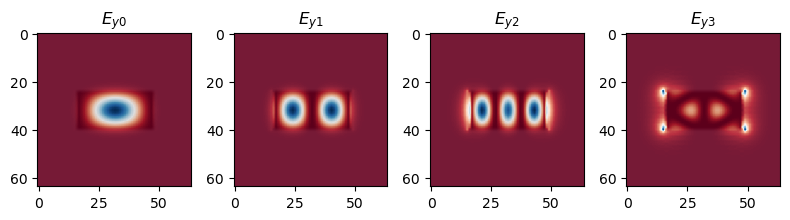

In [16]:
import meep as mp
from meep import mpb
import numpy as np
from matplotlib import pyplot as plt


Si   = mp.Medium(index=3.45)
SiO2 = mp.Medium(index=1.45)
wavelength = 1.55
omega      = 1/wavelength
w = 1    # Si width (um)
h = 0.5  # Si height (um)
geometry = [mp.Block(size=mp.Vector3(mp.inf, w, h), material=Si)]
resolution = 32  # pixels/um
sc_y = 2  # supercell width (um)
sc_z = 2  # supercell height (um)
geometry_lattice = mp.Lattice(size=mp.Vector3(0, sc_y, sc_z))

num_modes = 4
# Setup a simulation object
ms = mpb.ModeSolver(
    geometry_lattice = geometry_lattice,
    geometry         = geometry,
    resolution       = resolution,
    num_bands        = num_modes
)

# ------------------------------------------------- #
# Solve for all the modes at once, then plot
# ------------------------------------------------- #
E = []
store_fields = lambda ms_temp, mode: E.append(ms_temp.get_efield(which_band=mode,bloch_phase=False))    

k = ms.find_k(
    mp.EVEN_Z, # p
    omega, # omega
    1, # band_min
    num_modes, # band_max
    mp.Vector3(1,0,0), # korig_and_kdir
    1e-4, # tol
    omega * 3.45, # kmag_guess
    omega * 0.1, # kmag_min
    omega * 4, # kmag_max
    store_fields # band_funcs
)

eps = ms.get_epsilon()
plt.figure(figsize=(8,4))
# Plot the E fields
for mode in range(num_modes):
    print('Current band: {}'.format(mode+1))
    plt.subplot(1,num_modes,mode+1)
    plt.imshow(eps.transpose(), interpolation='spline36', cmap='binary')
    plt.imshow(np.abs(np.squeeze(E[mode][:,:,0,1]).transpose())**2, cmap='RdBu', alpha=0.9)
    plt.axis('on')
    plt.title('$E_{{y{}}}$'.format(mode))
plt.tight_layout()
plt.savefig('errorFields.png')

# ------------------------------------------------- #
# Solve for all the modes one by one
# ------------------------------------------------- #

# plt.figure(figsize=(8,4))
# for mode in range(num_modes):
#     k = ms.find_k(
#         p              = mp.EVEN_Z,
#         omega          = omega,
#         band_min       = mode+1,
#         band_max       = mode+1,
#         korig_and_kdir = mp.Vector3(1,0,0),
#         tol            = 1e-4,
#         kmag_guess     = omega * 3.45,
#         kmag_min       = omega * 0.1,
#         kmag_max       = omega * 4
#     )
#     E   = ms.get_efield(which_band=mode+1,bloch_phase=False)
#     plt.subplot(1,num_modes,mode+1)
#     plt.imshow(eps.transpose(), interpolation='spline36', cmap='binary')
#     plt.imshow(np.abs(np.squeeze(E[:,:,0,1]).transpose())**2, cmap='RdBu', alpha=0.9)
#     plt.axis('off')
#     plt.title('$E_{{y{}}}$'.format(mode))
# plt.tight_layout()
# plt.savefig('correctFields.png')

# plt.show()